# David's Section 2 - End to end Machine Learning Project

*This is my work through version of chapter 2*

**Download Data**

The first thing we need to do is download the data and it's best we do this in a function so that if the data updates then we can easily run a command to donwload it again rather than use a web browser manually. We will also define where the data is saved meaning that it is always stored in the same place!

In [3]:
import os
import tarfile
from six.moves import urllib

# Setting constants, hence capitalised - Remember all these direcotries are based on current directory!!

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
#   If housing path does not exist then use os library to create folder structure
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
#   Defining where the tgz is stored
    tgz_path = os.path.join(housing_path, "housing.tgz")
#   We have set it up so that the path we save to is similar to the url to get the files from
    urllib.request.urlretrieve(housing_url, tgz_path)
#   create tarfile object to open, store and save file.
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

When you call the **fetch_housing_data()** function it creates datasets/housing directory in your workspace, downoads the housing.tgz file and extracts the the housing.csv file from this directory!!

In [2]:
# We need to run our function
fetch_housing_data()



# Loading Data and getting visbility on data
Let's use Pandas to load the data!

In [6]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [15]:
# save dataframe as output of function and read top 5 rows of data
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [16]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


The info function is good to get information suahc as the number of rows in the data.

**Notice** that the total_bedrooms has only 20,433 nonnull values, meaning that 207 districts are missing this feature.

**Also Notice**, that ocean proximity is an object and we can see that the values shown are text. We can look into this field in more detail by using values_count() function as below:

In [18]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

We can also get a **summary** of the data using **describe()**.

In [20]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Here we get useful information including percentiles that show that 25% are below X and 50% are below Y and so on.

# Visualizing data

Here we have visualized the data easily using a histogram function. We can choose how mnay bins and therefore the granularity of the data..

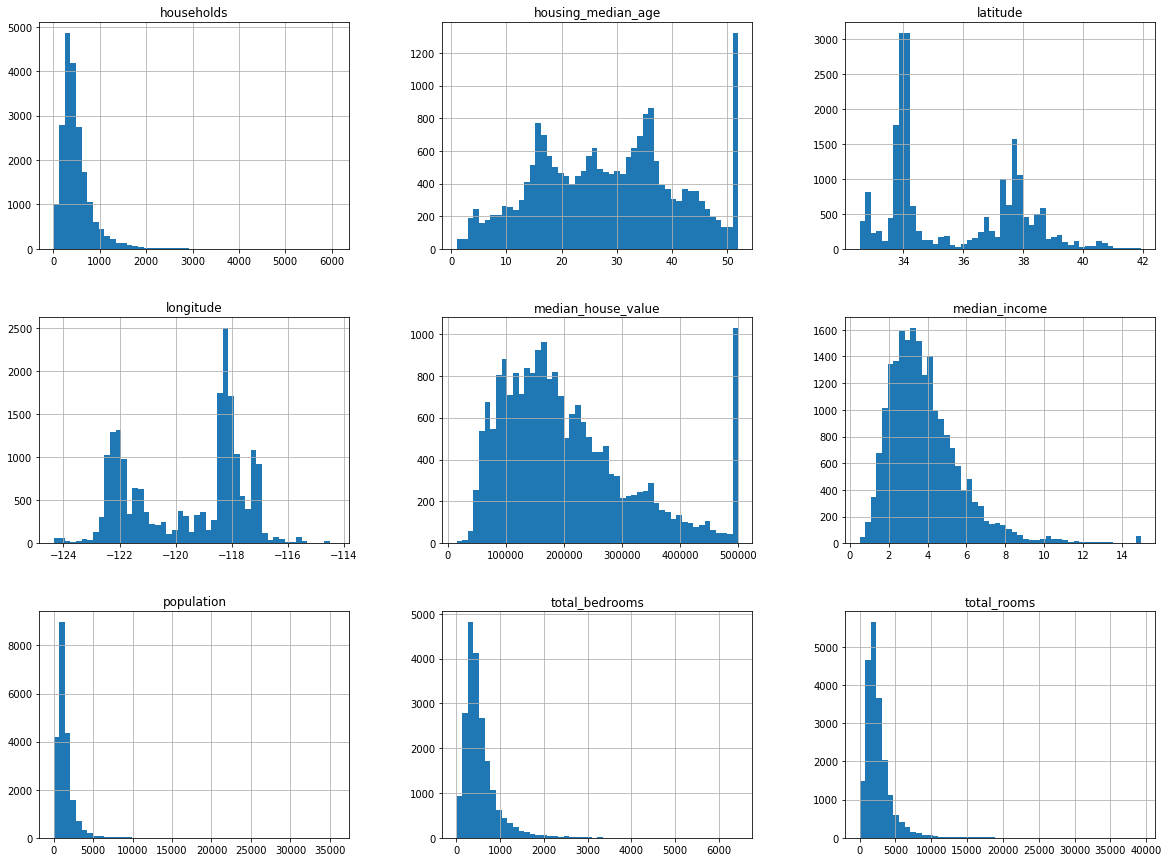

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

# We need to create a test set

We need a test set to test the data on, but don't look at it or you may accidently create a 'data snooping' bias by looking at the test data and making a decision off of it such as which model to use. So create the test set and don't look at it again!

In [62]:
import numpy as np

def split_train_test(data, test_ratio):
#   creates an array of randomly ordered numbers with length equal to array length
    shuffled_indicies = np.random.permutation(len(data))
#   test size defined as size multipled by test set ratio
    test_set_size = int(len(data) * test_ratio)
#   These indicies are just setting two 
    test_indicies = shuffled_indicies[:test_set_size]
    train_indicies = shuffled_indicies[test_set_size:]
#   iloc = integer-location based indexing for selection by position, so you just select all the values using
#   their indexes (randomized from the shuffled_indicies command)
    return data.iloc[train_indicies], data.iloc[test_indicies]


In [63]:
train_set, test_set = split_train_test(housing, 0.2)
print('Length of Training set: {}'.format(len(train_set)))
print('Length of Test set: {}'.format(len(test_set)))

Length of Training set: 16512
Length of Test set: 4128


In [64]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12117,-117.21,33.95,5.0,8403.0,1240.0,3962.0,1150.0,5.2174,155500.0,INLAND
19349,-123.01,38.67,33.0,914.0,147.0,394.0,132.0,4.6875,246200.0,<1H OCEAN
16095,-122.50,37.76,48.0,1408.0,295.0,891.0,269.0,3.8333,296300.0,NEAR OCEAN
16898,-122.37,37.58,52.0,1900.0,290.0,665.0,276.0,4.5486,500001.0,NEAR OCEAN
8966,-118.40,34.00,34.0,1816.0,335.0,872.0,339.0,4.8500,329400.0,<1H OCEAN


In [66]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
6758,-118.12,34.11,48.0,2124.0,319.0,785.0,319.0,5.2131,359600.0,<1H OCEAN
7754,-118.12,33.91,34.0,682.0,132.0,491.0,144.0,4.6389,173800.0,<1H OCEAN
19824,-119.48,36.50,32.0,3451.0,625.0,1968.0,574.0,2.9554,110300.0,INLAND
10754,-117.89,33.60,40.0,1639.0,352.0,498.0,278.0,5.6336,500001.0,<1H OCEAN
14157,-117.08,32.77,25.0,3911.0,849.0,1580.0,767.0,2.7778,184100.0,NEAR OCEAN


The problem with this solution is that everytime we run the split_train_test() function we will get a different training and test set. This is not good if we get new data as well as we will have to split the data and get a different test && training set!! :(

One solution and a common solution is to use each instances identifier to decide whether or not it should be in the test set or not (assuming instances have a unique and immutable identifier)

So a possible solution is as follows

In [67]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data,test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

What test_set_check does is uses a hash to make a **random unsigned 32-bit number** from an identifier (which in our case is the column number). This process creates a **randomly distributed output** and then we can use the test_ratio to compare if it is in the **bottom 20%** and if it is then we have it in our test set, else we keep it in our training set.


We have to provide an identifier column and the simplest way is to use row index as the **ID**:

In [95]:
housing_with_id = housing.reset_index() #adds an 'index' column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, 'index')

test_set

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
5,5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
12,12,-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.0750,213500.0,NEAR BAY
16,16,-122.27,37.85,52.0,1966.0,347.0,793.0,331.0,2.7750,152500.0,NEAR BAY
23,23,-122.27,37.84,52.0,1688.0,337.0,853.0,325.0,2.1806,99700.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...,...
20615,20615,-121.54,39.08,23.0,1076.0,216.0,724.0,197.0,2.3598,57500.0,INLAND
20617,20617,-121.53,39.06,20.0,561.0,109.0,308.0,114.0,3.3021,70800.0,INLAND
20622,20622,-121.44,39.00,20.0,755.0,147.0,457.0,157.0,2.4167,67000.0,INLAND
20626,20626,-121.43,39.18,36.0,1124.0,184.0,504.0,171.0,2.1667,93800.0,INLAND


## Important note

If we use the row index at the unique identifier then we need to make sure that new data always get appended to the end and values aren't added in between exisiting ones. Again, to make things more stable we could use the district's latitude and longitude as these are guaranteed to be stable for a few million years:

In [106]:
housing_with_id["id"] = housing["longitude"]* 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")
train_set

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-122192.12
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-122182.14
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-122202.15
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-122212.15
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-122212.15
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,-121050.52
20636,20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,-121170.51
20637,20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,-121180.57
20638,20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,-121280.57


## Using the power of Scikit-Learn

Scikit-Learn provides a few functions to split datasets into multiple subsets in various ways.

The simplest function is train_test_split() which does what ours does plus more!

First, there is a **random state** parameter that allows you to set random generator seed.

Second, and more interestingly, you can pass it **multiple datasets** with an **identical number of rows**, and it will split them on the same indicies:

In [109]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,229200.0,<1H OCEAN
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,97800.0,INLAND
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,222100.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN


So we have considered a purely random sampling method, but then we may fall into the porblem of creating a test set that doesn't accurately represent the data. So we could end up having a set of skewed data for our algorithm to learn from. So we need to find a better way...

For example, in **stratified sampling** we split the data into homogeneous subgroups called **strata**. For example if we had a survey of 1000 people in the US and the nation wide statistics of US population were **51.3% females** and **48.7% males** then we should maintain the ratio in the sample: **513 female and 487 males**.

Let's say that you speak to some experts and they say that the median income is a very important attribute to predict median house prices. You may want to to make sure the test set is **representative** of the various categories of income of the whole dataset. We want want to capture a sufficient number of instances in your dataset for each stratum.

In [114]:
housing["income_cat"] = pd.cut(housing["median_income"],
                              bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                              labels=[1,2,3,4,5])

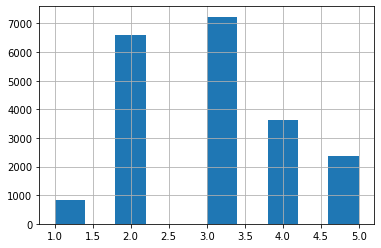

In [116]:
housing["income_cat"].hist()

Now we are ready to do stratified sampling based on the income category. For this you can use Scikit-Learn's **StratifiedShuffleSplit** class:

In [118]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [124]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

All of this was done to make sure that the test data accurately represented the overall data set. If we look below at the table we can see that the percent error for the stratifed set is much lower than that of the random set - which has up to **5% error**!

In [122]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [127]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039729,0.040213,0.973236,-0.243309
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114583,0.109496,-4.318374,0.127011


Now we remove the income_cat attribute so the data is back to its original form:

In [129]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

KeyError: "['income_cat'] not found in axis"

We spent quite a bit of time on test set generation for a good reason: this is an **often
neglected but critical** part of a **Machine Learning project**. Moreover, many of these
ideas will be useful later when we discuss **cross-validation**. Now it’s time to move on
to the next stage: exploring the data.

# Discover and Visualize data to gain insights



Let's look at the data. If the data set was huge we could make a smaller exploration set but our dataset is small enough that man ipulating it should not be computationally heavy. 

Let's make a **copy** so that we don't **harm the training set**:

In [139]:
housing = strat_train_set.copy()
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,240200.0,INLAND
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,113000.0,INLAND
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,97800.0,INLAND
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,225900.0,<1H OCEAN


## Visualising Geographical Data

Since there is geographical information (latitude and longitude), it is a good idea to create a **scatterplot of all districts** to visualize the data:

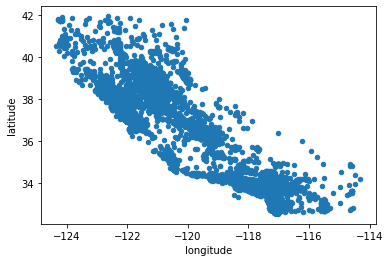

In [142]:
housing.plot(kind="scatter", x="longitude", y="latitude")

This quite nicely looks like california but other than that it is hard to see **any particular pattern**. Change the *alpha* option to *0.1* makes it easier to visualize the places where there is a higher density of points!!

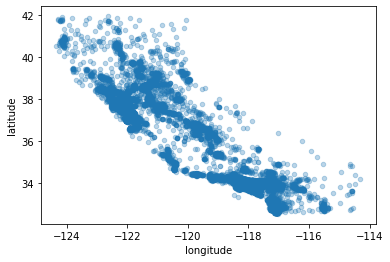

In [145]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=.3)